# Week 2: Preprocessing Text (Part 1)

It's conventional to group together all of the library imports required at the beginning of the notebook.  You will see these libraries in action later on.

In [1]:
import sys
import re
import pandas as pd
from itertools import zip_longest
from google.colab import drive

## Overview 
A raw text document is just a sequence of characters. There are a number of basic steps that are often performed when processing natural language text. In lab sessions this week we will cover some of the basic text pre-processing methods. In particular, you will be looking at:
- <b> tokenisation</b> - roughly speaking, this involves grouping characters into words;
- <b>case normalisation</b> - this involves converting all of the text into lower case; 
- <b>stemming</b> - this involves removing a word's inflections to find the stem; and 
- <b>punctuation and stop-word removal</b> - stop-words are common functions words that in some situations can be ignored.

Note that we do not always apply all of the above preprocessing methods; it depends on the application. One of the things that you will be learning about in this module, is when the application of each of these methods is, and is not, appropriate.

We are going to be writing some of our own code, in order to develop understanding of methods and python programming, as well as experimenting with **off-the-shelf** technology.  In particular, we are going to be using the Python library **NLTK** (Natural Language ToolKit) to carry out some of these pre-processing methods.  



### Available corpora
First, however, we need some text to process.  Natural language engineering applications typically deal with large collections of documents which are referred to as **corpora**.

We have provided simple interfaces to each of the following corpora, which interact well with NLTK tools.

- Amazon product reviews (~78k documents, ~640k sentences)
- Wall Street Journal text (~2k documents, ~51k sentences)
- Reuters articles (~61k documents, ~740k sentences)
  - Reuters / Finance (~47k documents, ~550k sentences)
  - Reuters / Sport (~13k documents, ~185k sentences)
- Medline abstracts (~985k documents, ~6100k sentences)
- Twitter posts (~962k documents, ~1720k sentences)

These interfaces are stored as libraries in the **resources folder** provided on Canvas.  You should make sure this is uploaded to your Google Drive and then you need to tell Python where this directory is.


In [2]:
import sys
import re
import pandas as pd
from itertools import zip_longest
from google.colab import drive
#mount google drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
import sys
import re
import pandas as pd
from itertools import zip_longest
from google.colab import drive
#update the system path so that Python knows to look in this folder for libraries
sys.path.append('/content/drive/My Drive/NLENotebooks/resources/')

## Getting raw sentences from a corpus
The corpora are too large to easily process with some of the functions you will be using, so we have provided a way for you to work on a randomly selected sample of each corpus.

Readers for the Reuters, Twitter and Medline corpora can be initialised using calls to: <code>ReutersCorpusReader()</code>, <code>TwitterCorpusReader()</code> and <code>MedlineCorpusReader()</code> respectively.

The readers for each of these corpora have a function called <code style="background-color: #F5F5F5;">sample_raw_sents</code>, which returns a specified number of random sentences, where each sentence is an un-tokenised string.

The code in the next cell shows you how to iterate over a random sample of 10 sentences. When you are using a tokeniser, you will replace
`# do something with sentence`
with code that tokenises each sentence and prints the results.

语料库太大，无法轻松处理您将要使用的某些功能，因此我们为您提供了一种方法来处理每个语料库的随机选择样本。

可以分别使用以下调用来初始化Reuters，Twitter和Medline语料库的读者：ReutersCorpusReader（），TwitterCorpusReader（）和MedlineCorpusReader（）。

每个语料库的阅读器都有一个名为sample_raw_sents的函数，该函数返回指定数量的随机句子，其中每个句子都是未标记的字符串。

下一个单元格中的代码向您展示如何迭代10个句子的随机样本。 当您使用标记词处理程序时，将用标记化每个句子并输出结果的代码替换＃用句子做某事。

In [6]:
import sys
import re
import pandas as pd
from itertools import zip_longest
from google.colab import drive
#import the ReutersCorpusReader class from the sussex_nltk's corpus_readers library
from sussex_nltk.corpus_readers import ReutersCorpusReader

rcr = ReutersCorpusReader()    #Create a new reader

sample_size = 10  #size of sample

for sentence in rcr.sample_raw_sents(sample_size): #get a sample of random sentences, where each sentence is a string
    # do something with sentence
    print(len(sentence))

61
63
53
17
54
16
18
52
115
28


### Exercise 1.1

- In the cell below, write code which will print a sample of **20** sentences from the **Twitter** corpus.  

Hint: Have a look at the corpus_readers.py file to check what class you need to import


In [5]:
from sussex_nltk.corpus_readers import TwitterCorpusReader

tcr = TwitterCorpusReader()    #Create a new reader

sample_size = 20  #size of sample

for sentence in tcr.sample_raw_sents(sample_size): #get a sample of random sentences, where each sentence is a string
    # do something with sentence
    print(sentence)

Sussex NLTK root directory is /content/drive/My Drive/NLENotebooks/resources
Israeli athletes who were murdered by Palestinian terrorists at the Munich Olympics Remembered http://t.co/RzQwWhQr #justoneminute #Munich11
Best. Olympics. Story. Ever. Christian newspaper refuses to use the word gay so calls Tyson Gay "Tyson Homosexual": http://t.co/zP2TyWa1
DTN Delhi 2010 Olympics 2012: Triple jumper Maheshwary exits after fouling all attempts - Zee News: Olympics 201... http://t.co/XZTNWP7f
RT @BBCFarayi: Seven athletes from #Cameroon have gone missing from the Olympic Village; #London2012
#olympics 1000 tv channels on your cell phone? http://t.co/cd3mfPNF http://t.co/56VgMXx4 fufu
No tarda en caer el gol! #VamosMexico #TriOlimpico #London2012
What can Michael Phelps and the Olympics teach us about real estate http://t.co/b0jp2pUa
@aNIALLator_ you got burnt haha gutted ;) yeah England is alright just hooked on the Olympics ! Your back in the 19th right ?
@TeamGB well done to @v_pendleton o

For more information, point your browser at [Sussex NLTK package documentation](http://www.sussex.ac.uk/Users/davidw/courses/nle/SussexNLTK-API/) and have a look around. This provides information about the above corpora. Take a particularly careful look at the [corpus_readers module](http://www.sussex.ac.uk/Users/davidw/courses/nle/SussexNLTK-API/sussex_nltk.html#module-sussex_nltk.corpus_readers)

### Exercise 1.2

- In the cell below write code that will take a sample of sentences from each of the Reuters, Twitter and Medline corpora and displays the average length (as measured in terms of the number of characters in the sentence).
在下面的单元格中编写代码，这些代码将从Reuters，Twitter和Medline语料库中的每一个句子中抽取样本，并显示平均长度（以句子中的字符数来衡量）。

- How large do you think the sample size should be in order to decide whether the differences observed are systematic or random? 

In [10]:
from sussex_nltk.corpus_readers import MedlineCorpusReader

mcr = MedlineCorpusReader()

samplesize=10

def averagelength(corpusreaders, number=samplesize):
  total=0
  for sent in corpusreader.sample_raw_sents(number):
    total+=len(sent)
  return total/number

print("Aaverage length of reuters sentences: {}".format(averagelength(rcr))）
      
print("Aaverage length of twitter sentences: {}".format(averagelength(tcr))）
      
print("Aaverage length of medline sentences: {}".format(averagelength(mcr))）

SyntaxError: ignored

## DIY Tokenisation with Regular Expressions
Text doesn't come in neat tokens ready for analysis, it must first undergo sentence segmentation and tokenisation.  
The sussex_nltk package handles sentence segmentation of the corpora for you.  
In this lab you will be focusing on tokenisation, in particular, you will be comparing the merits of the following tokenisers:  
- Your own regular expression based tokeniser
- The (NLTK implemented) PENN treebank style regular expression based tokeniser
- A Twitter-specific CMU tokeniser

### Issues to consider
Your goal when working through this next section should be to investigate the strengths and weaknesses of each of the 3 tokenisers on three rather different kinds of corpora: 
- the Reuters corpus 
- the Twitter corpus
- the Medline corpus

### Making your own tokeniser
In this section, you will write your own Python function, which takes as input a single string representing a sentence, and returns a <b>list of strings</b> obtained by splitting the sentence into tokens.

Let's start by simply splitting by whitespace. 

In [ ]:
print("   What    is the    air-speed   velocity of  an unladen swallow?   ".split()) 

['What', 'is', 'the', 'air-speed', 'velocity', 'of', 'an', 'unladen', 'swallow?']


### Exercise 2.1

- In the empty code cell below write a [function](http://docs.python.org/tutorial/controlflow.html#defining-functions), `tokenise` which takes a sentence as input and returns a list of the tokens making up the sentence. Your first version of this function should tokenise only on whitespace, as shown in the cell above. Show that your function works on the sentence shown above.
- Note: this is intended to be an easy exercise - just a couple of lines of code - don't overcomplicate it!

In [8]:
def tokenise (stence):
  return sentence.split()

s="   What    is the    air-speed   velocity of  an unladen swallow?   "
tokenise(s)

['Mode:', '75', 'basis', 'points', 'easier']

### Exercise 2.2

- In the empty code cell below write code that applies your tokenise function to each sentence in a sample of 30 sentences taken from  the Reuters, Twitter and Medline corpora, 10 sentences from each corpus.

In [9]:
ss=10
sample=rcr.sample_raw_sents(ss)+tcr.sample_raw_sents(ss)+mcr.sample_raw_sents(ss)
tokensized=[tokensise(sent) for sent in sample]
print(tokensized)

NameError: ignored

In most tokenisation policies (e.g. in the Wall Street Journal corpus), contractions like "I'm" tend to be split into "I" and "'m".  

When it comes to more than just splitting by whitespace, it can be convenient to use [regular expressions](http://docs.python.org/library/re.html) to process the string in some way. The following code cell illustrates this. Trying running it and then read on to discover how it works.

In [11]:
print(re.sub("([.?!'])", " \g<1>", "You're using coconuts!").split())   

['You', "'re", 'using', 'coconuts', '!']


Let's look at how the above code works by breaking it down.  

First, run the following cell.

In [ ]:
print(re.sub("'", " '", "You're using coconuts!")   )

You 're using coconuts!


As you can see, this code takes the string "You're using coconuts!" and inserts a space before the apostophe, the `'` character. 

Let's see how it works...

The first argument of `re.sub`, i.e. `"'"`, is a regular expression that in this case is extremely simple, since it only matches the apostophe character, `'`.

The second argument of `re.sub`, where we see `" '"`, indicates that an apostophe should be substituted by a space followed by an apostophe.

Now let's make it slightly more complicated. We also want to insert a space before the `"!"`, so let's look at how to do that. 

Run the following code cell.

In [ ]:
import re
print(re.sub("(['!])", " \g<1>", "You're using coconuts!")   )

You 're using coconuts !


The first argument of `re.sub`, has been changed to `"(['!])"`, which is a regular expression that matches either an apostophe character,`'`, or an exclamation mark,`!`.

This is achieved with the regular expression `"['!]"`, where the square brackets enclose the alternative characters. 

Why does the regular expression contain parenthesis? 

It has to do with what we need to put as the second argument of `re.sub` where the substitution is specified. 

To understand this, you need to appreciate that we want to add a space before an apostrophe and also a space before an exclamation mark. How can we specify that in the second argument of `re.sub`? 

The answer is that we need to make use of the the idea of a **group**.

The parenthesis in `"(['!])"` define the start and end of a group. In this case the whole regular expression is a group. In general, however, there can be several sets of parenthesis defining several groups. For example, the regular expression `"([Tt]h)e (m*n)"` has two groups. Groups are numbered from left to right, so the group in the regular expression `"(['!])"` is group 1. 

Defining this group allows us to refer to the string that matches the regular expression `"(['!])"`, which will be either an apostrophe or an exclamation mark. This is then used in the second argument of `re.sub`, where we see `" \g<1>"`, which indicates that the material that matches the apostophe or exclamation mark should be substituted by a space followed by the symbol that was matched. The `1` in `\g<1>` tells us that it is group one.

We are now ready to look at the original code, which is reproduced below and should now make sense. 

In [ ]:
print(re.sub("([.?!'])", " \g<1>", "You're using coconuts!").split())   

['You', "'re", 'using', 'coconuts', '!']


First, the spaces are added before any full stop, question mark, exclamation mark or apostrophe.
The resulting string is then split on white space.

### Exercise 2.3

- Write a new version of your `tokenise` function that uses `re.sub` in the way we've just considered. Make sure you test your new function

In [12]:
def tokenise (sent):
  return re.sub("([.?!'])","\g<1>",sent),split()

tokenise(s)

tokenise("   What    is the    air-speed   velocity of  an unladen swallow?   ")

NameError: ignored

### Exercise 2.4


- In an empty code cell below, extend your tokeniser function to cater for the following guidelines. 
- Test out your new tokeniser on the string  
`"After saying \"I won't help, I'm gonna leave!\", on his parents' arrival, the boy's behaviour improved."`  
 notice that the `"` characters in the test sentence have been espaced, appearing as `\"`.

### Guidelines

- punctuation is split from adjoining words
- opening double quotes are changed to two single forward quotes.
- closing double quotes are changed to two single backward quotes.
- the Anglo-Saxon genitive of nouns are split into their component parts.
  - e.g. `"children's"` produces `"children 's"`
  - e.g. `"parents'"` produces `"parents '"`
- contractions should be split into component parts
  - e.g. `"won't"` produces `"wo n't"`
  - e.g. `"gonna"` produces `"gon na"`
  - e.g. `"I'm"` produces `"I 'm"`
  
  
These tokenisation guidelines are a subset of those found at
ftp://ftp.cis.upenn.edu/pub/treebank/public_html/tokenization.html



### Hints:

- Use multiple calls to `re.sub` to deal with different cases one at a time. As in...

```
    sentence = re.sub(<pattern1>, <replacement1>,sentence)
    sentence = re.sub(<pattern2>, <replacement2>,sentence)
    sentence = re.sub(<pattern3>, <replacement3>,sentence)
```

- Order your calls to `re.sub` so that you deal with the specific cases first and the more general cases later.

- In dealing with the replacement of start and end `"`, you will find the following useful:

>The `'*'`, `'+'`, and `'?'` qualifiers are all *greedy*; they match
>as much text as possible.  Sometimes this behaviour isn't desired; if the RE
>`<.\*>` is matched against `<a> b <c>`, it will match the entire
>string, and not just `<a>`.  Adding `'?'` after the qualifier makes it
>perform the match in *non-greedy* or *minimal* fashion; as *few*
>characters as possible will be matched.  Using the RE `<.\*?>` will match
>only `<a>`.  
(taken from https://docs.python.org/2/library/re.html).


## The NLTK regular expression tokeniser
The NLTK implements a regular expression tokeniser `word_tokenize` that is based on the above tokenisation guidelines. 

**Function**: `word_tokenize`

- Arguments
 - a single string, representing a sentence
- Returns
 - a list of strings, where each string is a token within the sentence</dd>

### Exercise 3.1

- Make sure you understand the code in the cell below and then run it so that you can compare the way that the test sentence has been tokenised by the two tokenisers.

In [13]:
#import the word_tokenize function from nltk
from nltk.tokenize import word_tokenize

# run the nltk tokeniser on a test sentence
test_sentence="The cat sat on the mat."
word_tokenize(test_sentence) 


LookupError: ignored

The first time you run this, you will probably get an error because certain NLTK resources ('punkt') are not available.

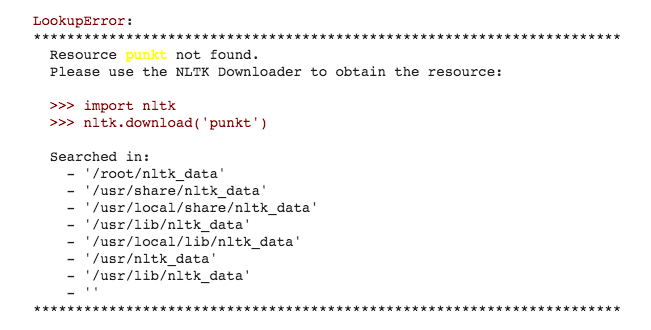

To fix this, you need to run the following cell.  This will start an interactive download process.  

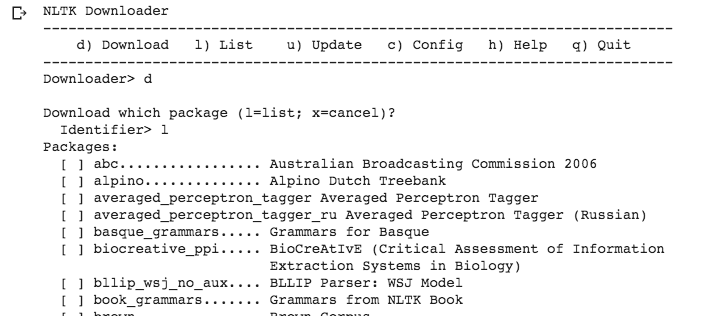

If you select 'd' for download and then 'l' for list, you can see all of the NLTK resources available.  Here, we want to choose 'punkt'.  Make sure you type 'q' to quit from the downloader afterwards.  Otherwise, this cell will keep running and you won't be able to do anything else.   

In [ ]:
import nltk
nltk.download()

Now the tokeniser should work.

In [ ]:
import nltk
nltk.download()
#import the word_tokenize function from nltk
from nltk.tokenize import word_tokenize

# run the nltk tokeniser on a test sentence
test_sentence="The cat sat on the mat."
word_tokenize(test_sentence) 


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> 1
    Error loading 1: Package '1' not found in index

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> cat
    Error loading cat: Package 'cat' not found in index

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel

LookupError: ignored

Now lets try something harder and compare the results of using the nltk tokeniser and the DIY tokeniser you developed earlier

In [ ]:
testsentence = "After saying \"I won't help, I'm gonna leave!\", on his parents' arrival, the boy's behaviour improved."

# run the nltk tokeniser and your tokeniser on the test sentence
nltk_toks = word_tokenize(testsentence) # run the nltk tokeniser
my_toks = tokenise(testsentence) # run your tokeniser

pd.DataFrame(list(zip_longest(nltk_toks,my_toks)),columns=["NLTK", "MINE"])

### Exercise 3.2

- In the code cell below write code to run both the `NLTK_Tokenise` and your own `Tokenise` function on a sample of 10 sentences from the Reuters corpus.
- Look for differences in the output of the two tokenisers.


## **EXTENSION**
## The Twitter-specific Tokeniser
The third tokeniser for you to explore is a Twitter-specific tokeniser that has been developed by [Gimpel et al.](http://ttic.uchicago.edu/~kgimpel/papers/gimpel+etal.acl11.pdf).

These functions are located in the <code>sussex_nltk.tokenize</code> module

---
**Function**: `twitter_tokenize`
- Arguments
 - a single string, representing a sentence
- Returns
 - a list of strings, where each string is a token within the sentence
---

`twitter_tokenize` can be quite slow, so we have provided the following function to tokenise an entire sample of sentences at once.  

---
**Function**: `twitter_tokenize_batch`
- Arguments
 - a list of strings, where each string represents a sentence
- Returns
 - a list of sentences, where each sentence is a list of tokens
---

In [ ]:
from sussex_nltk.tokenize import twitter_tokenize
twitter_toks = twitter_tokenize(testsentence)
print(twitter_toks)

### Java Error!!!

If you are runnning the notebook on your own machine (or a lab machine) rather than colab, the twitter_tokenizer may fail because it cannot find the JRE.  If this happens to you, you will need to locate the java executable, and then update and run the cell below 

In [ ]:
import nltk
nltk.internals.config_java("C:/Program Files (x86)/Common Files/Oracle/Java/javapath/java.exe",options='-Xmx1g -XX:ParallelGCThreads=2')


### Exercise 4.1 (**EXTENSION**)
- In the empty cell below, write code to run both  `twitter_tokenize` and the NLTK tokeniser, `word_tokenize`, function on each sentence in a sample of 10 sentences from the Twitter corpus.
- Display each sentence tokenised by the two tokenisers. 
- Once you have done this, look for differences in the output of the two tokenisers.



### Exercise 4.2 (**EXTENSION**)
- Copy the code cell above and move the copy to below this cell. Then use both the NLTK and Twitter tokenisers on a sample of 10 sentences from the **Medline** corpus.
- Look for situations where the  tokenisers do not tokenise appropriately.
- Try to figure out the differences in tokenisation policies of the tokenisers.
- Think about possible motivations for the differences in tokenisation policy, by considering how the tokens may be used in subsequent (down-stream) language processing steps.
